In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Task 1: Read the Application Data.

#### Read the Application Data

Read the application file provided and store it in a dataframe `df_app`.

In [3]:
# Read the csv file using 'read_csv'

df_app = pd.read_csv('application_data.csv')

#### Inspect the Dataframe df_app

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [4]:
# Check the number of rows and columns in the application dataframe

df_app.shape

(307511, 122)

In [5]:
# Check the column-wise info of the dataframe

df_app.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [6]:
# Check the summary for the numeric columns 

df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## Task 2: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. Lets start with data cleaning, data analysis and data manipulation part.

In [7]:
# Check for the first 10 rows

df_app.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


#### Handling Missing Values

In [8]:
## Check for the missing values in overall dataframe

df_app.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

We see that there are lot of missing values in our dataframe. So we will use below techniques to handle the missing values - 

1. Drop all the columns where missing values > 50 percent.
2. Remove all the records where missing value lies between 10 and 20 percent.

In [9]:
## Drop all the columns where missing values percentage is greater than 50

for col in df_app.columns:
    if ~(df_app[col].isnull().value_counts(normalize=True)[False]*100 > 50):
        df_app.drop(columns=col, inplace=True)

In [10]:
## Check the rows and columns of the dataframe after dropping the columns

df_app.shape

(307511, 81)

In [11]:
## Filter the records where missing values are greater than 10 percent and less than 20 percent

for col in df_app.columns:
    if (df_app[col].isnull().value_counts(normalize=True)[False]*100 == 100) & ~(df_app[col].isnull().value_counts(normalize=True)[False]*100 < 20):
        True
    elif ~((df_app[col].isnull().value_counts(normalize=True)[False]*100 > 10) & (df_app[col].isnull().value_counts(normalize=True)[False]*100 < 20)):
        df_app = df_app[~(df_app[col].isnull())]

In [12]:
## Check the rows and columns of the dataframe after dropping the columns

df_app.shape

(84575, 81)

#### Filter Columns Irrelevant for the analysis

In [13]:
## Drop All the Flag Documents Column as they do not seem to be relevant for our analysis, most of the values are = 0 
## df_app.columns[df_app.columns.str.startswith('FLAG_DOCUMENT')]

df_app = df_app.drop(columns = df_app.columns[df_app.columns.str.startswith('FLAG_DOCUMENT')])

In [14]:
## Check the rows and columns of the dataframe after dropping the columns

df_app.shape

(84575, 61)

#### Fixing/Handling inappropriate column datatypes

In [15]:
## Check if the datatypes of the object columns are appropriate

df_app.select_dtypes(include=['object'])

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,No
12,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,FRIDAY,Business Entity Type 2,No
13,Cash loans,M,Y,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Drivers,THURSDAY,Self-employed,No
18,Revolving loans,F,N,Y,Other_A,Working,Secondary / secondary special,Widow,House / apartment,Laborers,FRIDAY,Housing,No
22,Cash loans,F,N,N,Unaccompanied,Working,Secondary / secondary special,Married,Rented apartment,Sales staff,THURSDAY,Self-employed,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307495,Cash loans,M,Y,N,Unaccompanied,Working,Higher education,Married,House / apartment,High skill tech staff,WEDNESDAY,Business Entity Type 3,No
307498,Cash loans,M,Y,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,MONDAY,Construction,No
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,No
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,No


In [16]:
## Check if the datatypes of the integer columns are appropriate

df_app.select_dtypes(include=['int64'])

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,100002,1,0,-9461,-637,-2120,1,1,0,1,...,0,2,2,10,0,0,0,0,0,0
12,100016,0,0,-13439,-2717,-3227,1,1,1,1,...,0,2,2,10,0,0,0,0,0,0
13,100017,0,1,-14086,-3028,-4911,1,1,0,1,...,0,2,2,13,0,0,0,0,0,0
18,100022,0,0,-17718,-7804,-1259,1,1,0,1,...,0,1,1,13,0,0,0,0,0,0
22,100026,0,1,-11146,-4306,-2518,1,1,0,1,...,0,3,2,6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307495,456239,0,0,-20922,-7438,-4440,1,1,0,1,...,0,2,2,14,0,0,0,0,0,0
307498,456242,0,0,-19102,-3689,-2650,1,1,0,1,...,0,1,1,10,0,0,0,0,0,0
307508,456253,0,0,-14966,-7921,-5150,1,1,0,1,...,1,3,3,9,0,0,0,0,1,1
307509,456254,1,0,-11961,-4786,-931,1,1,0,1,...,0,2,2,9,0,0,0,1,1,0


In [17]:
## Check if the datatypes of the integer columns are appropriate

df_app.select_dtypes(include=['float64'])

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,1.0,0.262949,0.139376,0.9722,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
12,67500.0,80865.0,5881.5,67500.0,0.031329,-311.0,2.0,0.715042,0.176653,0.9811,...,0.0,0.0,0.0,-2370.0,0.0,0.0,0.0,1.0,0.0,0.0
13,225000.0,918468.0,28966.5,697500.0,0.016612,-643.0,3.0,0.566907,0.770087,0.9806,...,0.0,0.0,0.0,-4.0,0.0,0.0,0.0,0.0,0.0,1.0
18,112500.0,157500.0,7875.0,157500.0,0.046220,-8751.0,1.0,0.706428,0.556727,0.9881,...,0.0,8.0,0.0,-239.0,0.0,0.0,0.0,0.0,0.0,0.0
22,450000.0,497520.0,32521.5,450000.0,0.020713,-114.0,3.0,0.457143,0.358951,0.9786,...,0.0,0.0,0.0,-468.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307495,180000.0,808650.0,23773.5,675000.0,0.025164,-9596.0,2.0,0.267834,0.597192,0.9871,...,0.0,0.0,0.0,-2919.0,0.0,0.0,0.0,0.0,0.0,1.0
307498,198000.0,1312110.0,52168.5,1125000.0,0.072508,-746.0,2.0,0.746259,0.406617,0.9891,...,0.0,0.0,0.0,-734.0,0.0,0.0,0.0,0.0,0.0,2.0
307508,153000.0,677664.0,29979.0,585000.0,0.005002,-6737.0,1.0,0.535722,0.218859,0.9816,...,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,171000.0,370107.0,20205.0,319500.0,0.005313,-2562.0,2.0,0.514163,0.661024,0.9771,...,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


Object & Integer colums are appropriately defined but few float columns are not hence we will change the datatype to its relevant type which is Integer.

In [18]:
## Convert the float columns to appropriate datatype i.e. Integer

amt_req_credit_cols = df_app.columns[df_app.columns.str.startswith('AMT_REQ_CREDIT_BUREAU')]
df_app[amt_req_credit_cols] = df_app[amt_req_credit_cols].astype('int64')

cnt_social_circle_cols = df_app.columns[df_app.columns.str.endswith('CNT_SOCIAL_CIRCLE')]
df_app[cnt_social_circle_cols] = df_app[cnt_social_circle_cols].astype('int64')

df_app['CNT_FAM_MEMBERS'] = df_app['CNT_FAM_MEMBERS'].astype('int64')
df_app['DAYS_REGISTRATION'] = df_app['DAYS_REGISTRATION'].astype('int64')
df_app['DAYS_LAST_PHONE_CHANGE'] = df_app['DAYS_LAST_PHONE_CHANGE'].astype('int64')

In [19]:
## Check the info of the dataframe

df_app.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84575 entries, 0 to 307510
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    84575 non-null  int64  
 1   TARGET                        84575 non-null  int64  
 2   NAME_CONTRACT_TYPE            84575 non-null  object 
 3   CODE_GENDER                   84575 non-null  object 
 4   FLAG_OWN_CAR                  84575 non-null  object 
 5   FLAG_OWN_REALTY               84575 non-null  object 
 6   CNT_CHILDREN                  84575 non-null  int64  
 7   AMT_INCOME_TOTAL              84575 non-null  float64
 8   AMT_CREDIT                    84575 non-null  float64
 9   AMT_ANNUITY                   84575 non-null  float64
 10  AMT_GOODS_PRICE               84575 non-null  float64
 11  NAME_TYPE_SUITE               84575 non-null  object 
 12  NAME_INCOME_TYPE              84575 non-null  object 
 13  

#### Handling Outliers

In [20]:
## Check for the Outliers in the dataset

df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,84575.000000,84575.000000,84575.000000,8.457500e+04,8.457500e+04,84575.000000,8.457500e+04,84575.000000,84575.000000,84575.000000,...,84575.000000,84575.000000,84575.000000,84575.000000,84575.000000,84575.000000,84575.000000,84575.000000,84575.000000,84575.000000
mean,278296.458977,0.074206,0.478439,1.914492e+05,6.441473e+05,28853.737316,5.804763e+05,0.021862,-15005.726669,-2541.073958,...,0.138410,1.384345,0.095939,-1030.247662,0.006858,0.007508,0.034289,0.340526,0.256104,1.835625
std,102939.811682,0.262108,0.730024,4.165226e+05,4.252680e+05,15130.405426,3.913159e+05,0.015028,3631.879538,2469.677041,...,0.448705,2.545433,0.362206,851.581207,0.086856,0.118031,0.204606,1.102460,0.602381,1.812905
min,100002.000000,0.000000,0.000000,2.700000e+04,4.500000e+04,2205.000000,4.500000e+04,0.000290,-25200.000000,-17912.000000,...,0.000000,0.000000,0.000000,-4185.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188972.500000,0.000000,0.000000,1.260000e+05,2.925000e+05,17865.000000,2.700000e+05,0.010032,-17758.000000,-3412.000000,...,0.000000,0.000000,0.000000,-1652.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278628.000000,0.000000,0.000000,1.620000e+05,5.437350e+05,26487.000000,4.545000e+05,0.019689,-14809.000000,-1758.000000,...,0.000000,0.000000,0.000000,-847.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367730.500000,0.000000,1.000000,2.250000e+05,9.000000e+05,36652.500000,7.695000e+05,0.028663,-12072.000000,-816.000000,...,0.000000,2.000000,0.000000,-314.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7678.000000,-1.000000,...,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,24.000000,8.000000,17.000000


We see that the AMT_INCOME_TOTAL has high value equal to 117M and is an outlier so we will drop this record.

In [21]:
## Get the maximum value of AMT_INCOME_TOTAL

df_app.AMT_INCOME_TOTAL.max()

117000000.0

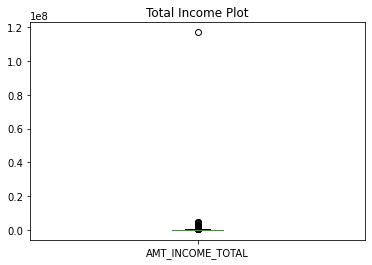

In [22]:
## Plot the boxplot to observe outliers

df_app.AMT_INCOME_TOTAL.plot.box()
plt.title('Total Income Plot')
plt.savefig('income_outlier.png')
plt.show()

In [23]:
## Drop the above highlighted outlier record

df_app = df_app[~(df_app.AMT_INCOME_TOTAL == df_app.AMT_INCOME_TOTAL.max())]

In [24]:
## Check for the outlier in Total Income column

df_app.AMT_INCOME_TOTAL.describe()

count    8.457400e+04
mean     1.900680e+05
std      1.102740e+05
min      2.700000e+04
25%      1.260000e+05
50%      1.620000e+05
75%      2.250000e+05
max      4.500000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [25]:
## Check the rows and columns after removing the outlier

df_app.shape

(84574, 61)

#### Handling the Incorrect values in GENDER column

In [26]:
## Check distinct values of Gender

df_app.CODE_GENDER.value_counts()

F      53213
M      31359
XNA        2
Name: CODE_GENDER, dtype: int64

In [27]:
## Drop the records where Gender is XNA as they seem to be incorrectly/mistakenly created

df_app = df_app[~(df_app.CODE_GENDER == 'XNA')]

In [28]:
## Check the rows and columns of the dataframe after dropping the records

df_app.shape

(84572, 61)

In [29]:
## Check the info of the dataframe

df_app.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84572 entries, 0 to 307510
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SK_ID_CURR                    84572 non-null  int64  
 1   TARGET                        84572 non-null  int64  
 2   NAME_CONTRACT_TYPE            84572 non-null  object 
 3   CODE_GENDER                   84572 non-null  object 
 4   FLAG_OWN_CAR                  84572 non-null  object 
 5   FLAG_OWN_REALTY               84572 non-null  object 
 6   CNT_CHILDREN                  84572 non-null  int64  
 7   AMT_INCOME_TOTAL              84572 non-null  float64
 8   AMT_CREDIT                    84572 non-null  float64
 9   AMT_ANNUITY                   84572 non-null  float64
 10  AMT_GOODS_PRICE               84572 non-null  float64
 11  NAME_TYPE_SUITE               84572 non-null  object 
 12  NAME_INCOME_TYPE              84572 non-null  object 
 13  

In [30]:
## Check the missing values on overall dataframe again

df_app.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 61, dtype: int64

#### Check the imbalance data percent

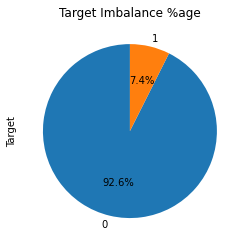

In [31]:
## Check for the imbalance percent of Target Variable

df_app.TARGET.value_counts(normalize=True).plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Target Imbalance %age')
plt.ylabel('Target')
plt.savefig('target_imbalance.png')
plt.show()

We now can see that there are no missing values/incorrect data in the application dataframe. Lets go ahead and divide the dataframe on Target Variable having 0 and 1 value.

In [32]:
#Dividing the Application dataframe on Target Variable

df_app_tgt_1 = df_app[df_app['TARGET'] == 1]
df_app_tgt_0 = df_app[df_app['TARGET'] == 0]

In [33]:
## Check the rows and columns of dataframe with 0 target value

df_app_tgt_0.shape

(78297, 61)

In [34]:
## Check the rows and columns of dataframe with 1 target value

df_app_tgt_1.shape

(6275, 61)

## Task 3 : Univariate Analysis

Univariate Analysis on different variables of both the divided target dataframes

In [35]:
## Check distinct values of Gender

df_app_tgt_1.CODE_GENDER.value_counts()

F    3492
M    2783
Name: CODE_GENDER, dtype: int64

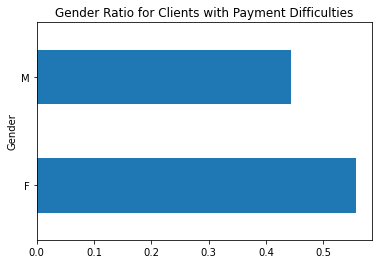

In [36]:
#plot the bar graph of percentage Gender categories

df_app_tgt_1.CODE_GENDER.value_counts(normalize=True).plot.barh()
plt.title('Gender Ratio for Clients with Payment Difficulties')
plt.ylabel('Gender')
plt.show()

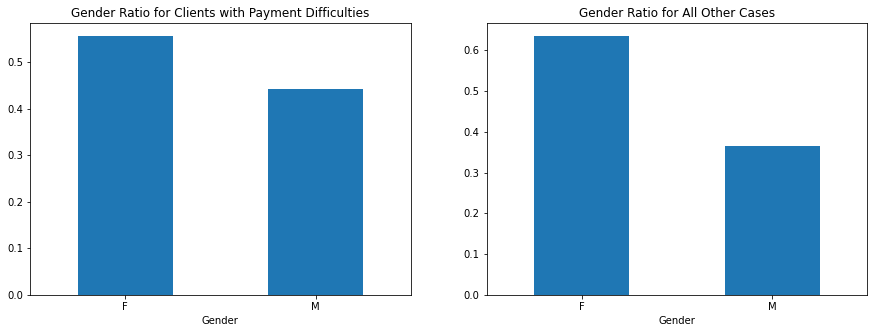

In [37]:
# Plot - 1: Gender(x) Ratio

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
df_app_tgt_1.CODE_GENDER.value_counts(normalize=True).plot.bar(rot=0)
plt.title('Gender Ratio for Clients with Payment Difficulties')
plt.xlabel('Gender')
plt.subplot(1,2,2)
df_app_tgt_0.CODE_GENDER.value_counts(normalize=True).plot.bar(rot=0)
plt.title('Gender Ratio for All Other Cases')
plt.xlabel('Gender')
plt.savefig('gender.png')
plt.show()

In [38]:
## Check distinct values of Contract Type

df_app_tgt_1.NAME_CONTRACT_TYPE.value_counts()

Cash loans         5868
Revolving loans     407
Name: NAME_CONTRACT_TYPE, dtype: int64

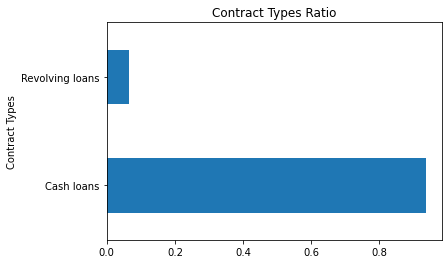

In [39]:
#plot the bar graph of percentage NAME_CONTRACT_TYPE categories

df_app_tgt_1.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.barh()
plt.title('Contract Types Ratio')
plt.ylabel('Contract Types')
plt.show()

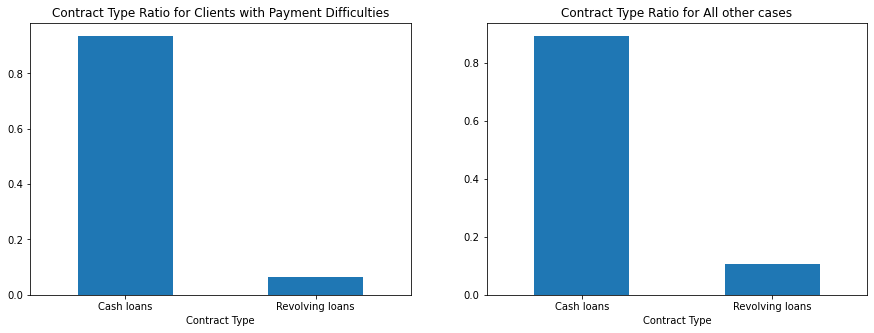

In [40]:
# Plot - 2: Contract Type(x) Ratio

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
df_app_tgt_1.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar(rot=0)
plt.title('Contract Type Ratio for Clients with Payment Difficulties')
plt.xlabel('Contract Type')
plt.subplot(1,2,2)
df_app_tgt_0.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar(rot=0)
plt.title('Contract Type Ratio for All other cases')
plt.xlabel('Contract Type')
plt.savefig('contract_type.png')
plt.show()

In [41]:
## Check distinct values of FLAG_OWN_CAR Variable

df_app_tgt_1.FLAG_OWN_CAR.value_counts()

N    4215
Y    2060
Name: FLAG_OWN_CAR, dtype: int64

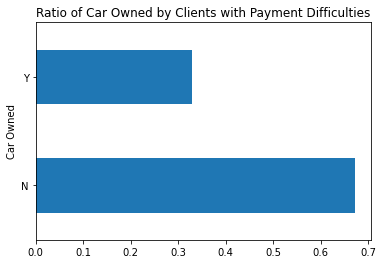

In [42]:
#plot the bar graph of percentage FLAG_OWN_CAR categories

df_app_tgt_1.FLAG_OWN_CAR.value_counts(normalize=True).plot.barh()
plt.title('Ratio of Car Owned by Clients with Payment Difficulties')
plt.ylabel('Car Owned')
plt.show()

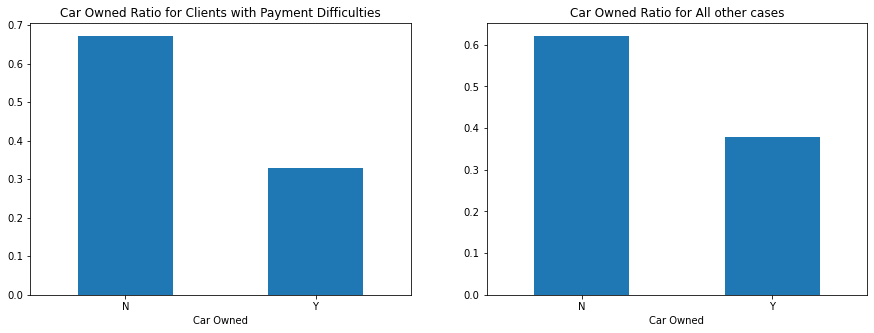

In [43]:
# Plot - 3: Contract Type(x) Ratio

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
df_app_tgt_1.FLAG_OWN_CAR.value_counts(normalize=True).plot.bar(rot=0)
plt.title('Car Owned Ratio for Clients with Payment Difficulties')
plt.xlabel('Car Owned')
plt.subplot(1,2,2)
df_app_tgt_0.FLAG_OWN_CAR.value_counts(normalize=True).plot.bar(rot=0)
plt.title('Car Owned Ratio for All other cases')
plt.xlabel('Car Owned')
plt.savefig('car_owned.png')
plt.show()

In [44]:
## Check distinct values of NAME_TYPE_SUITE Variable

df_app_tgt_1.NAME_TYPE_SUITE.value_counts()

Unaccompanied      5248
Family              701
Spouse, partner     214
Children             53
Other_B              35
Other_A              19
Group of people       5
Name: NAME_TYPE_SUITE, dtype: int64

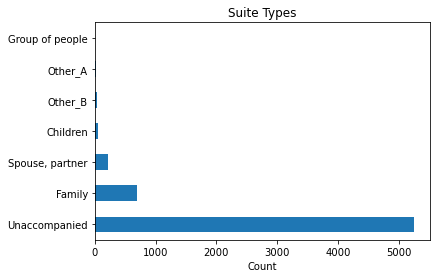

In [45]:
#plot the bar graph of percentage NAME_TYPE_SUITE categories

df_app_tgt_1.NAME_TYPE_SUITE.value_counts().plot.barh()
plt.title('Suite Types')
plt.xlabel('Count')
plt.show()

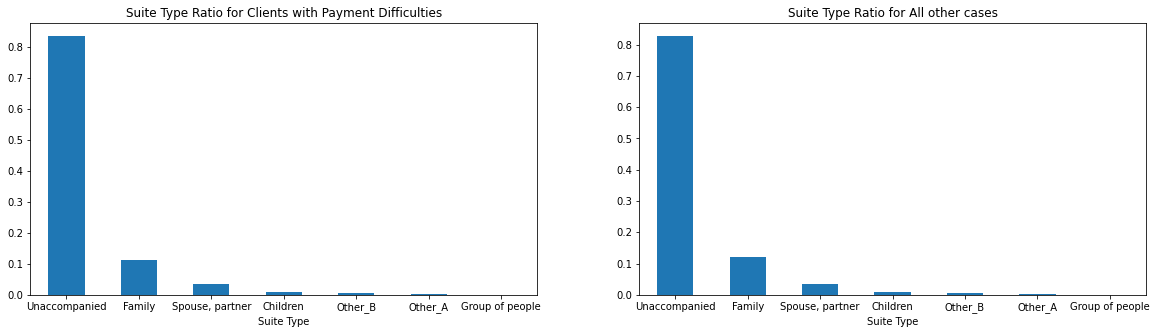

In [46]:
# Plot - 4: Suite Type(x) Ratio

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
df_app_tgt_1.NAME_TYPE_SUITE.value_counts(normalize=True).plot.bar(rot=0)
plt.title('Suite Type Ratio for Clients with Payment Difficulties')
plt.xlabel('Suite Type')
plt.subplot(1,2,2)
df_app_tgt_0.NAME_TYPE_SUITE.value_counts(normalize=True).plot.bar(rot=0)
plt.title('Suite Type Ratio for All other cases')
plt.xlabel('Suite Type')
plt.savefig('suite_type.png')
plt.show()

In [47]:
## Check distinct values of NAME_INCOME_TYPE Variable

df_app_tgt_1.NAME_INCOME_TYPE.value_counts()

Working                 4198
Commercial associate    1715
State servant            362
Name: NAME_INCOME_TYPE, dtype: int64

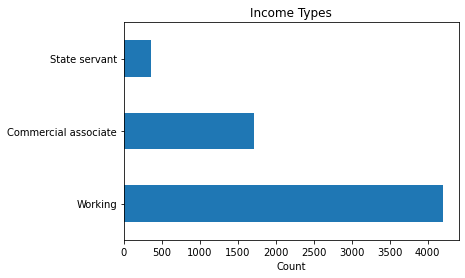

In [48]:
#plot the bar graph of percentage NAME_INCOME_TYPE categories

df_app_tgt_1.NAME_INCOME_TYPE.value_counts().plot.barh()
plt.title('Income Types')
plt.xlabel('Count')
plt.show()

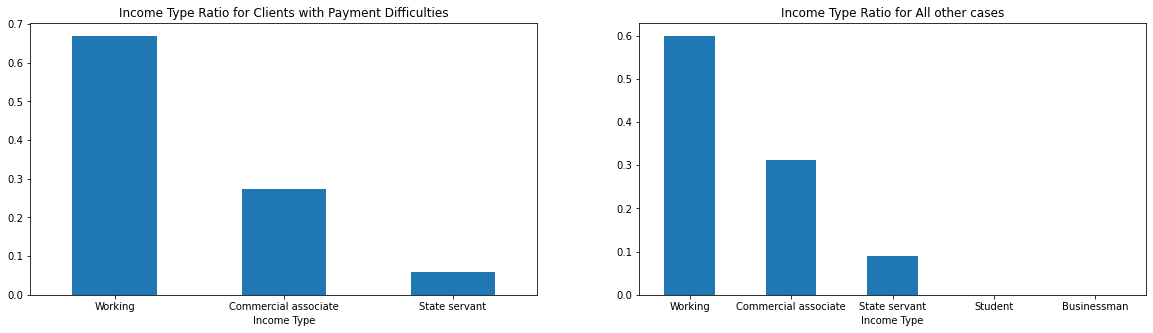

In [49]:
# Plot - 5: Income Type(x) Ratio

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
df_app_tgt_1.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar(rot=0)
plt.title('Income Type Ratio for Clients with Payment Difficulties')
plt.xlabel('Income Type')
plt.subplot(1,2,2)
df_app_tgt_0.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar(rot=0)
plt.title('Income Type Ratio for All other cases')
plt.xlabel('Income Type')
plt.savefig('income_type.png')
plt.show()

In [50]:
## Check distinct values of NAME_EDUCATION_TYPE Variable

df_app_tgt_1.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    4618
Higher education                 1341
Incomplete higher                 253
Lower secondary                    62
Academic degree                     1
Name: NAME_EDUCATION_TYPE, dtype: int64

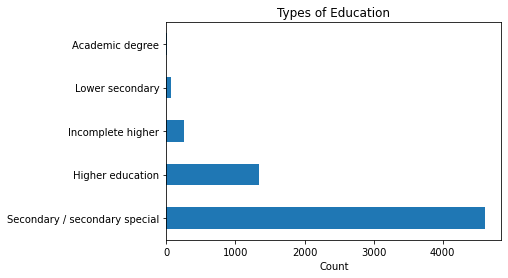

In [51]:
#plot the bar graph of percentage NAME_EDUCATION_TYPE categories

df_app_tgt_1.NAME_EDUCATION_TYPE.value_counts().plot.barh()
plt.title('Types of Education')
plt.xlabel('Count')
plt.show()

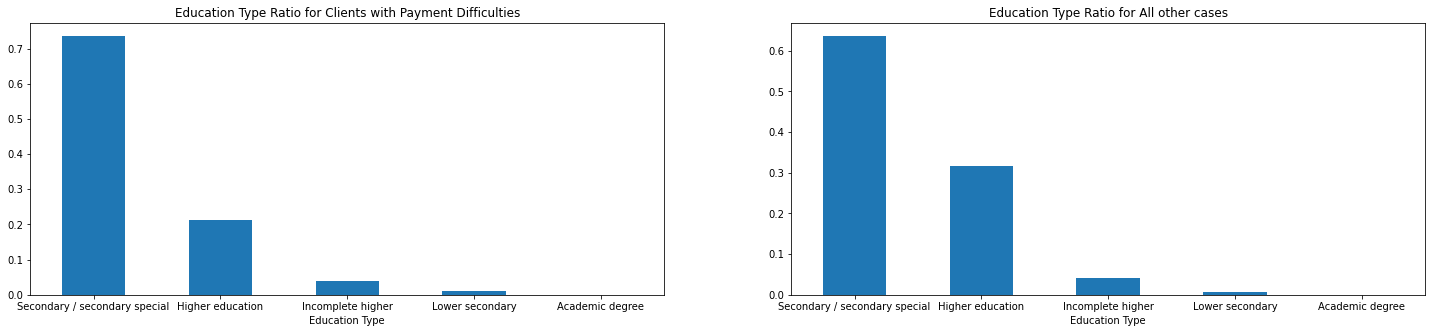

In [52]:
# Plot - 6: Education Type(x) Ratio

plt.figure(figsize=[25,5])
plt.subplot(1,2,1)
df_app_tgt_1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar(rot=0)
plt.title('Education Type Ratio for Clients with Payment Difficulties')
plt.xlabel('Education Type')
plt.subplot(1,2,2)
df_app_tgt_0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar(rot=0)
plt.title('Education Type Ratio for All other cases')
plt.xlabel('Education Type')
plt.savefig('education_type.png')
plt.show()

In [53]:
## Check distinct values of NAME_FAMILY_STATUS Variable

df_app_tgt_1.NAME_FAMILY_STATUS.value_counts()

Married                 3738
Single / not married    1170
Civil marriage           770
Separated                479
Widow                    118
Name: NAME_FAMILY_STATUS, dtype: int64

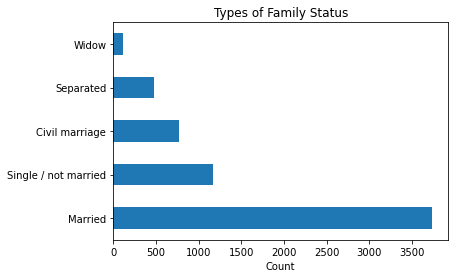

In [54]:
#plot the bar graph of percentage NAME_FAMILY_STATUS categories

df_app_tgt_1.NAME_FAMILY_STATUS.value_counts().plot.barh()
plt.title('Types of Family Status')
plt.xlabel('Count')
plt.show()

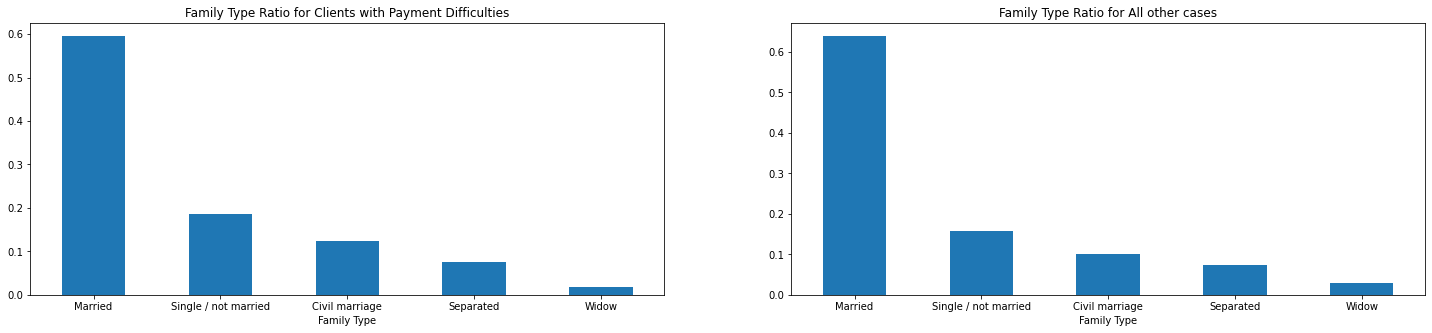

In [55]:
# Plot - 6: Family Type(x) Ratio

plt.figure(figsize=[25,5])
plt.subplot(1,2,1)
df_app_tgt_1.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar(rot=0)
plt.title('Family Type Ratio for Clients with Payment Difficulties')
plt.xlabel('Family Type')
plt.subplot(1,2,2)
df_app_tgt_0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar(rot=0)
plt.title('Family Type Ratio for All other cases')
plt.xlabel('Family Type')
plt.savefig('family_type.png')
plt.show()

In [56]:
## Check distinct values of NAME_HOUSING_TYPE Variable

df_app_tgt_1.NAME_HOUSING_TYPE.value_counts()

House / apartment      5401
With parents            402
Municipal apartment     313
Rented apartment         98
Co-op apartment          31
Office apartment         30
Name: NAME_HOUSING_TYPE, dtype: int64

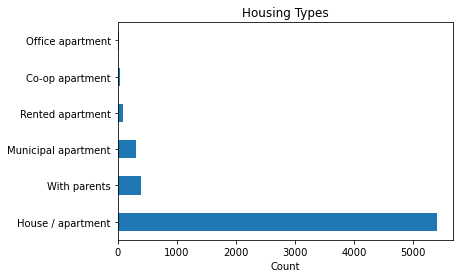

In [57]:
#plot the bar graph of percentage NAME_HOUSING_TYPE categories

df_app_tgt_1.NAME_HOUSING_TYPE.value_counts().plot.barh()
plt.title('Housing Types')
plt.xlabel('Count')
plt.show()

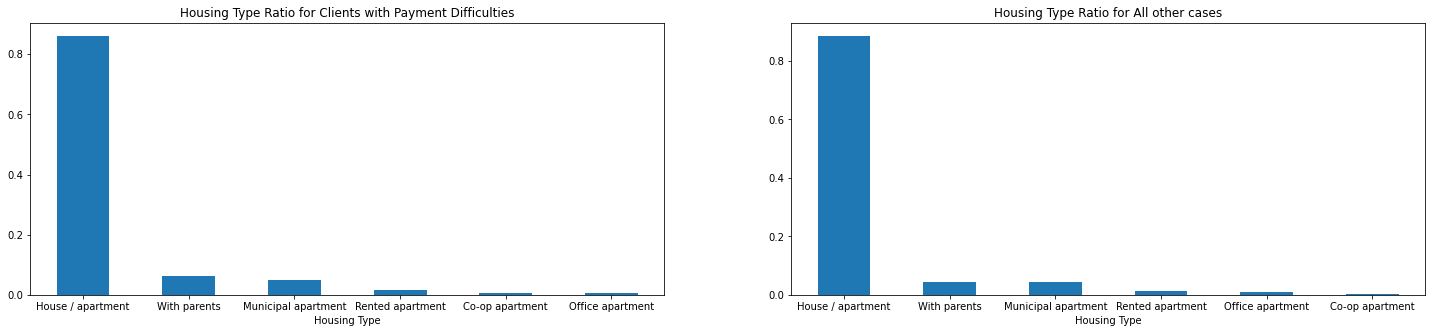

In [58]:
# Plot - 7: Housing Type(x) Ratio

plt.figure(figsize=[25,5])
plt.subplot(1,2,1)
df_app_tgt_1.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar(rot=0)
plt.title('Housing Type Ratio for Clients with Payment Difficulties')
plt.xlabel('Housing Type')
plt.subplot(1,2,2)
df_app_tgt_0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar(rot=0)
plt.title('Housing Type Ratio for All other cases')
plt.xlabel('Housing Type')
plt.savefig('housing_type.png')
plt.show()

In [59]:
## Check distinct values of OCCUPATION_TYPE Variable

df_app_tgt_1.OCCUPATION_TYPE.value_counts()

Laborers                 1923
Sales staff               993
Drivers                   653
Core staff                631
Managers                  526
High skill tech staff     302
Security staff            209
Accountants               204
Cooking staff             193
Medicine staff            192
Cleaning staff            158
Low-skill Laborers         85
Private service staff      69
Waiters/barmen staff       47
Secretaries                40
Realty agents              20
HR staff                   19
IT staff                   11
Name: OCCUPATION_TYPE, dtype: int64

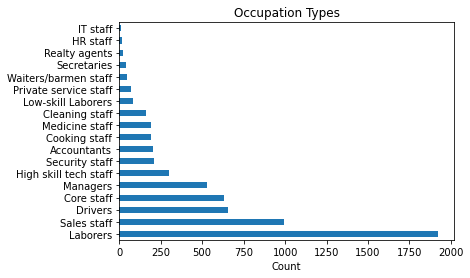

In [60]:
#plot the bar graph of percentage OCCUPATION_TYPE categories

df_app_tgt_1.OCCUPATION_TYPE.value_counts().plot.barh()
plt.title('Occupation Types')
plt.xlabel('Count')
plt.show()

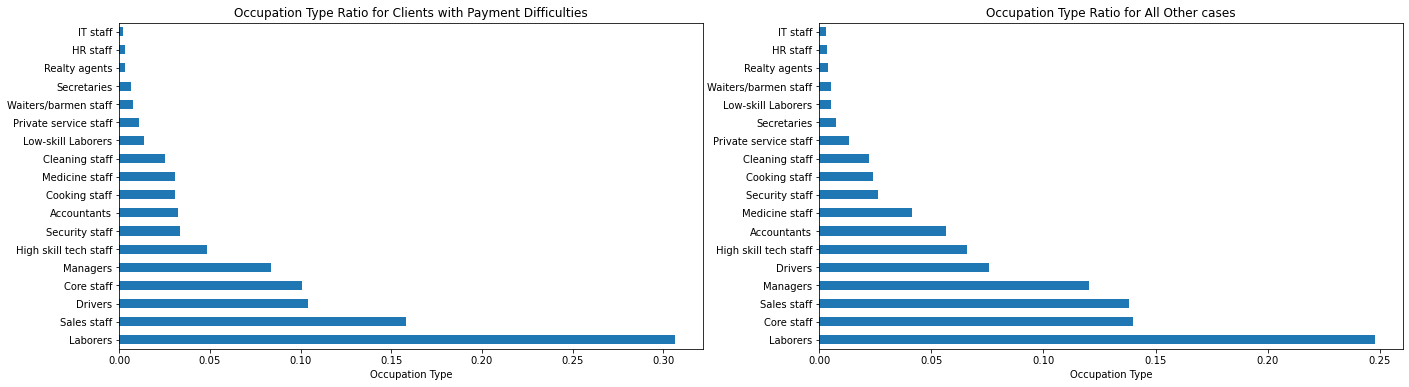

In [61]:
# Plot - 8: Occupation Type(x) Ratio

plt.figure(figsize=[23,6])
plt.subplot(1,2,1)
df_app_tgt_1.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh(rot=0)
plt.title('Occupation Type Ratio for Clients with Payment Difficulties')
plt.xlabel('Occupation Type')
plt.subplot(1,2,2)
df_app_tgt_0.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh(rot=0)
plt.title('Occupation Type Ratio for All Other cases')
plt.xlabel('Occupation Type')
plt.savefig('occupation_type.png')
plt.show()

## Task 4 : Bivariate Analysis

Bivariate Analysis on different variables of Target dataframes.

#### Numerical-Numerical Analysis

In [62]:
## Select float type variables for analysis

df_app.select_dtypes(include=['float64'])

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE
0,202500.0,406597.5,24700.5,351000.0,0.018801,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149
12,67500.0,80865.0,5881.5,67500.0,0.031329,0.715042,0.176653,0.9811,0.1667,0.9811,0.1667,0.9811,0.1667,0.0612
13,225000.0,918468.0,28966.5,697500.0,0.016612,0.566907,0.770087,0.9806,0.3333,0.9806,0.3333,0.9806,0.3333,0.1417
18,112500.0,157500.0,7875.0,157500.0,0.046220,0.706428,0.556727,0.9881,0.0833,0.9881,0.0833,0.9881,0.0833,0.0238
22,450000.0,497520.0,32521.5,450000.0,0.020713,0.457143,0.358951,0.9786,0.1667,0.9786,0.1667,0.9786,0.1667,0.0696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307495,180000.0,808650.0,23773.5,675000.0,0.025164,0.267834,0.597192,0.9871,0.3333,0.9871,0.3333,0.9871,0.3333,0.0700
307498,198000.0,1312110.0,52168.5,1125000.0,0.072508,0.746259,0.406617,0.9891,0.6667,0.9891,0.6667,0.9891,0.6667,0.1778
307508,153000.0,677664.0,29979.0,585000.0,0.005002,0.535722,0.218859,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.7970
307509,171000.0,370107.0,20205.0,319500.0,0.005313,0.514163,0.661024,0.9771,0.0417,0.9772,0.0417,0.9771,0.0417,0.0086


In [63]:
## Find Highly Correlated Variables for Target 1

c = df_app_tgt_1.corr().abs()
s = c.unstack()
s = s[~(s.isnull())]
s = s[(s != 1 )]
so = s.sort_values(kind="quicksort", ascending = False)
so.head(20)

OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998598
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998598
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997328
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997328
                              FLOORSMAX_MODE                  0.988543
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.988543
                              FLOORSMAX_AVG                   0.986403
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.986403
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.984411
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.984411
AMT_CREDIT                    AMT_GOODS_PRICE                 0.983196
AMT_GOODS_PRICE               AMT_CREDIT                      0.983196
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.953940
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.953940
YEARS_

In [64]:
## Find Highly Correlated Variables for Target 0

c = df_app_tgt_0.corr().abs()
s = c.unstack()
s = s[~(s.isnull())]
s = s[(s != 1 )]
so = s.sort_values(kind="quicksort", ascending = False)
so.head(20)

OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998779
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998779
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997124
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997124
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.988309
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.988309
AMT_CREDIT                    AMT_GOODS_PRICE                 0.987081
AMT_GOODS_PRICE               AMT_CREDIT                      0.987081
FLOORSMAX_MODE                FLOORSMAX_AVG                   0.985786
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.985786
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.984492
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.984492
                              YEARS_BEGINEXPLUATATION_MODE    0.947812
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.947812
REGION

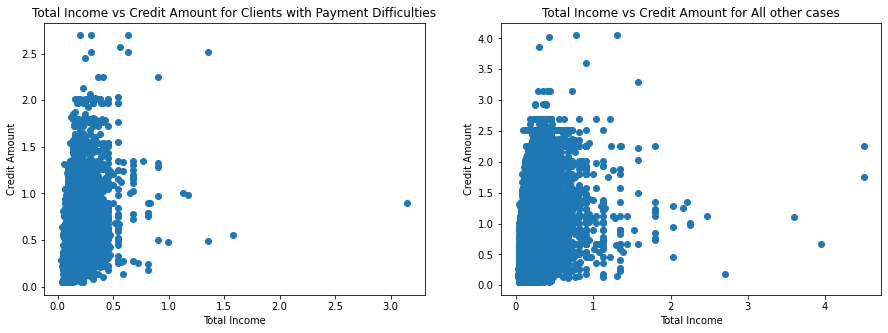

In [65]:
# Plot - 1: Total Income(x) vs Credit Amount(y)

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.scatter(df_app_tgt_1.AMT_INCOME_TOTAL/1000000, df_app_tgt_1.AMT_CREDIT/1000000)
plt.title('Total Income vs Credit Amount for Clients with Payment Difficulties')
plt.xlabel('Total Income')
plt.ylabel('Credit Amount')
plt.subplot(1,2,2)
plt.scatter(df_app_tgt_0.AMT_INCOME_TOTAL/1000000, df_app_tgt_0.AMT_CREDIT/1000000)
plt.title('Total Income vs Credit Amount for All other cases')
plt.xlabel('Total Income')
plt.ylabel('Credit Amount')
plt.savefig('bi_tot_and_credit_amt.png')
plt.show()

In [66]:
df_app_tgt_1[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']].corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
AMT_INCOME_TOTAL,1.000000,0.311195,0.385054,0.318614
AMT_CREDIT,0.311195,1.000000,0.742535,0.983196
AMT_ANNUITY,0.385054,0.742535,1.000000,0.745994
AMT_GOODS_PRICE,0.318614,0.983196,0.745994,1.000000


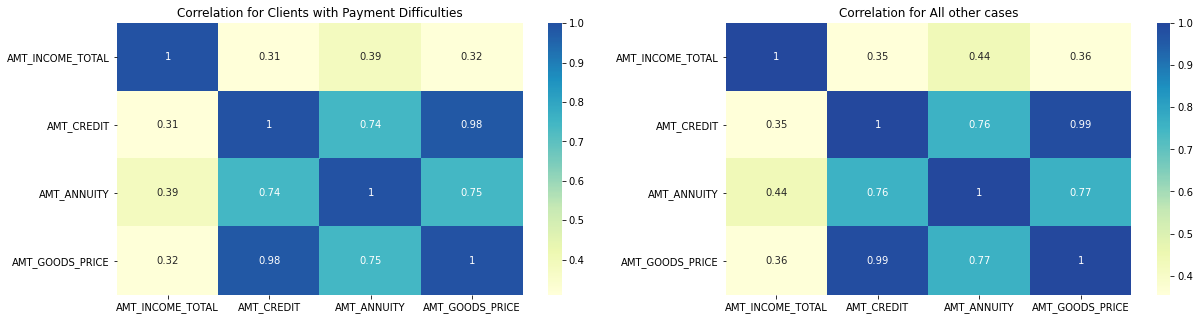

In [67]:
# Plot - 2: Heatmap for 4 varaiables - AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
sns.heatmap(df_app_tgt_1[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']].corr(), annot=True, cmap='YlGnBu', center=0.75)
plt.title('Correlation for Clients with Payment Difficulties')
plt.subplot(1,2,2)
sns.heatmap(df_app_tgt_0[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']].corr(), annot=True, cmap='YlGnBu', center=0.75)
plt.title('Correlation for All other cases')
plt.savefig('correlation_heatmap.png')
plt.show()

#### Numerical-Categorical Analysis

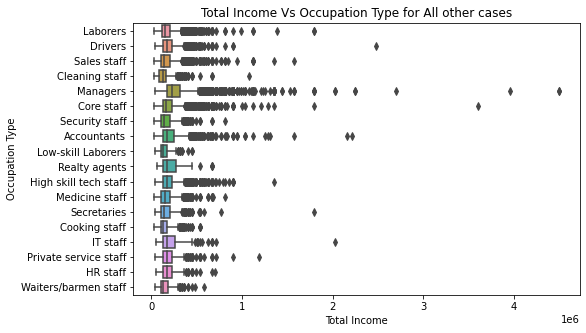

In [68]:
# Plot - 3: Boxplot of AMT_INCOME_TOTAL and OCCUPATION_TYPE for Target=0.

plt.figure(figsize=[8,5])
sns.boxplot(data=df_app_tgt_0, y='OCCUPATION_TYPE', x='AMT_INCOME_TOTAL')
plt.title('Total Income Vs Occupation Type for All other cases')
plt.xlabel('Total Income')
plt.ylabel('Occupation Type')
plt.savefig('bi_tot_amt_occupation.png')
plt.show()

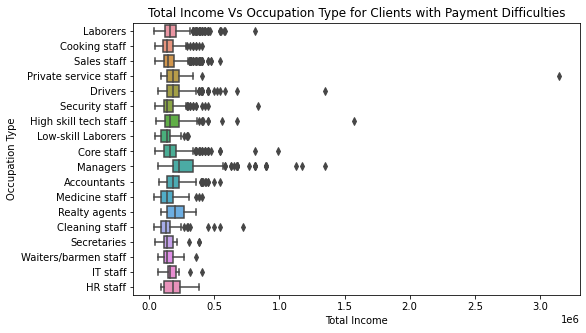

In [69]:
# Plot - 4: Boxplot of AMT_INCOME_TOTAL and OCCUPATION_TYPE for Target=1.

plt.figure(figsize=[8,5])
sns.boxplot(data=df_app_tgt_1, y='OCCUPATION_TYPE', x='AMT_INCOME_TOTAL')
plt.title('Total Income Vs Occupation Type for Clients with Payment Difficulties')
plt.xlabel('Total Income')
plt.ylabel('Occupation Type')
plt.savefig('bi_tot_amt_occupation_1.png')
plt.show()

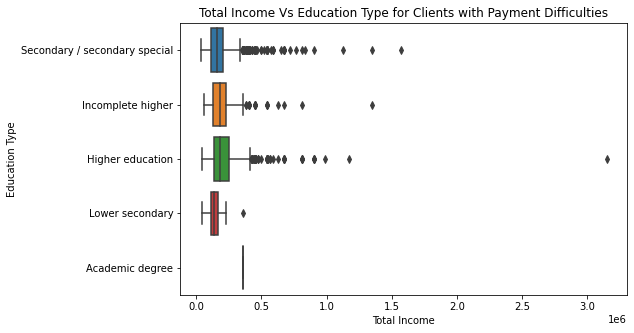

In [70]:
# Plot - 5: Boxplot of AMT_INCOME_TOTAL and NAME_EDUCATION_TYPE

plt.figure(figsize=[8,5])
sns.boxplot(data=df_app_tgt_1, y='NAME_EDUCATION_TYPE', x='AMT_INCOME_TOTAL')
plt.title('Total Income Vs Education Type for Clients with Payment Difficulties')
plt.xlabel('Total Income')
plt.ylabel('Education Type')
plt.savefig('bi_tot_income_edu_1.png')
plt.show()

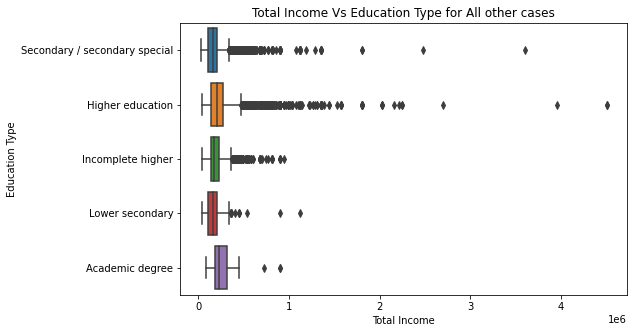

In [71]:
# Plot - 6: Boxplot of AMT_INCOME_TOTAL and NAME_EDUCATION_TYPE

plt.figure(figsize=[8,5])
sns.boxplot(data=df_app_tgt_0, y='NAME_EDUCATION_TYPE', x='AMT_INCOME_TOTAL')
plt.title('Total Income Vs Education Type for All other cases')
plt.xlabel('Total Income')
plt.ylabel('Education Type')
plt.savefig('bi_tot_income_edu_0.png')
plt.show()

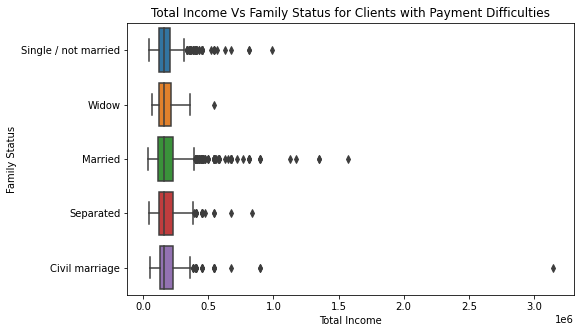

In [72]:
# Plot - 7: Boxplot of AMT_INCOME_TOTAL and NAME_FAMILY_STATUS

plt.figure(figsize=[8,5])
sns.boxplot(data=df_app_tgt_1, y='NAME_FAMILY_STATUS', x='AMT_INCOME_TOTAL')
plt.title('Total Income Vs Family Status for Clients with Payment Difficulties')
plt.xlabel('Total Income')
plt.ylabel('Family Status')
plt.savefig('bi_tot_income_family_1.png')
plt.show()

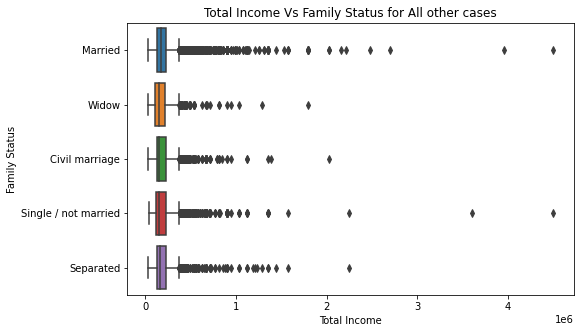

In [73]:
# Plot - 8: Boxplot of AMT_INCOME_TOTAL and NAME_FAMILY_STATUS

plt.figure(figsize=[8,5])
sns.boxplot(data=df_app_tgt_0, y='NAME_FAMILY_STATUS', x='AMT_INCOME_TOTAL')
plt.title('Total Income Vs Family Status for All other cases')
plt.xlabel('Total Income')
plt.ylabel('Family Status')
plt.savefig('bi_tot_income_family_0.png')
plt.show()

#### Categorical-Categorical Analysis

We will create buckets from AMT_INCOME_TOTAL column and plot the graph for the analysis.

In [74]:
## Create buckets of Total Income 

df_app['AMT_INCOME_RANGE'] = pd.cut(df_app.AMT_INCOME_TOTAL[:], [0,100000,200000,300000,400000,1000000], labels=['VERY LOW','LOW','MEDIUM','HIGH','VERY HIGH'])

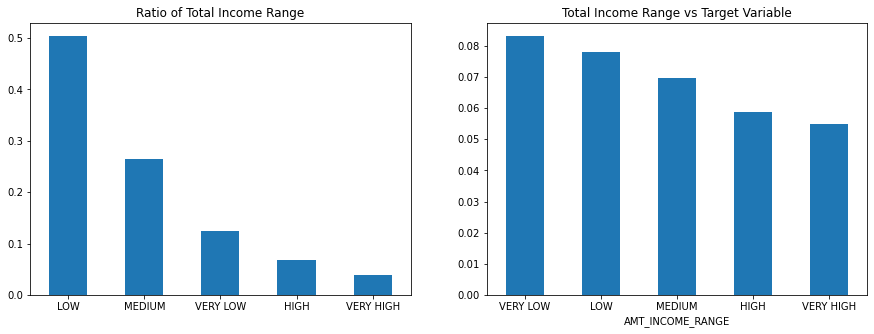

In [75]:
# Plot - 9: Barplot of Total Income Range(x) vs Target Variable(y)

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
df_app.AMT_INCOME_RANGE.value_counts(normalize=True).plot.bar(rot=0)
plt.title('Ratio of Total Income Range')
plt.subplot(1,2,2)
df_app.groupby('AMT_INCOME_RANGE')['TARGET'].mean().plot.bar(rot=0)
plt.title('Total Income Range vs Target Variable')
plt.savefig('bi_tot_income_range_target.png')
plt.show()

### Task 5: Read the Application Data.

#### Read the Previous Application Data

Read the previous application file provided and store it in a dataframe `df_prev_app`.

In [76]:
# Read the csv file using 'read_csv'

df_prev_app = pd.read_csv('previous_application.csv')

#### Inspect the Dataframe df_app

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [77]:
# Check the number of rows and columns in the application dataframe

df_prev_app.shape

(1670214, 37)

In [78]:
# Check the column-wise info of the dataframe

df_prev_app.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [79]:
# Check the summary for the numeric columns 

df_prev_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## Task 6: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. Lets start with data cleaning, data analysis and data manipulation part.

In [80]:
# Check for the first 10 rows

df_prev_app.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
## Check for the missing values in overall dataframe

df_prev_app.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

We see that there are lot of missing values in our dataframe. So we will use same technique to handle the missing values as we did for application data- 

1. Drop all the columns where missing values > 50 percent.
2. Remove all the records where missing value lies between 10 and 20 percent.

In [82]:
## Drop all the columns where missing values percentage is greater than 50

for col in df_prev_app.columns:
    if ~(df_prev_app[col].isnull().value_counts(normalize=True)[False]*100 > 50):
        df_prev_app.drop(columns=col, inplace=True)

In [83]:
## Check the rows and columns of the dataframe after dropping the columns

df_prev_app.shape

(1670214, 33)

In [84]:
## Filter the records where missing values are greater than 10 percent and less than 20 percent

for col in df_prev_app.columns:
    if (df_prev_app[col].isnull().value_counts(normalize=True)[False]*100 == 100) & ~(df_prev_app[col].isnull().value_counts(normalize=True)[False]*100 < 20):
        True
    elif ~((df_prev_app[col].isnull().value_counts(normalize=True)[False]*100 > 10) & (df_prev_app[col].isnull().value_counts(normalize=True)[False]*100 < 20)):
        df_prev_app = df_prev_app[~(df_prev_app[col].isnull())]

In [85]:
## Check the rows and columns of the dataframe after dropping the columns

df_prev_app.shape

(638335, 33)

In [86]:
## Check the missing values again, we will not find any missing value records now

df_prev_app.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_

#### Fixing/Handling Inappropriate Column Datatypes

In [87]:
## Check if the datatypes of the object columns are appropriate

df_prev_app.select_dtypes(include=['object'])

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
1,Cash loans,THURSDAY,Y,XNA,Approved,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,XNA,low_action,Cash X-Sell: low
2,Cash loans,TUESDAY,Y,XNA,Approved,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,high,Cash X-Sell: high
5,Cash loans,SATURDAY,Y,Everyday expenses,Approved,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,low_normal,Cash X-Sell: low
10,Cash loans,FRIDAY,Y,XNA,Approved,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,low_normal,Cash X-Sell: low
11,Cash loans,FRIDAY,Y,XNA,Approved,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,middle,Cash X-Sell: middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670208,Cash loans,THURSDAY,Y,XNA,Approved,Cash through the bank,XAP,Unaccompanied,Refreshed,XNA,Cash,x-sell,Credit and cash offices,XNA,middle,Cash X-Sell: middle
1670210,Consumer loans,TUESDAY,Y,XAP,Approved,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,Furniture,middle,POS industry with interest
1670211,Consumer loans,MONDAY,Y,XAP,Approved,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,Consumer electronics,low_normal,POS household with interest
1670212,Cash loans,WEDNESDAY,Y,XNA,Approved,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),XNA,low_normal,Cash X-Sell: low


In [88]:
## Check if the datatypes of the object columns are appropriate

df_prev_app.select_dtypes(include=['int64'])

,SK_ID_PREV,SK_ID_CURR,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA
1,2802425,108129,11,1,-164,-1
2,2523466,122040,11,1,-301,-1
5,1383531,199383,8,1,-684,-1
10,1715995,447712,7,1,-735,-1
11,2257824,161140,10,1,-815,-1
...,...,...,...,...,...,...
1670208,1556789,209732,17,1,-1279,100
1670210,2357031,334635,15,1,-1694,43
1670211,2659632,249544,12,1,-1488,1370
1670212,2785582,400317,9,1,-1185,-1


In [89]:
## Check if the datatypes of the object columns are appropriate

df_prev_app.select_dtypes(include=['float64'])

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1,25188.615,607500.0,679671.0,607500.0,36.0,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,15060.735,112500.0,136444.5,112500.0,12.0,365243.0,-271.0,59.0,365243.0,365243.0,1.0
5,23703.930,315000.0,340573.5,315000.0,18.0,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
10,11368.620,270000.0,335754.0,270000.0,54.0,365243.0,-705.0,885.0,-345.0,-334.0,1.0
11,13832.775,211500.0,246397.5,211500.0,30.0,365243.0,-785.0,85.0,-725.0,-721.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1670208,22299.390,315000.0,436216.5,315000.0,36.0,365243.0,-1249.0,-199.0,-919.0,-912.0,1.0
1670210,6622.020,87750.0,64291.5,87750.0,12.0,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,11520.855,105237.0,102523.5,105237.0,10.0,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,18821.520,180000.0,191880.0,180000.0,12.0,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


Object & Integer colums are appropriately defined but few float columns are not hence we will change the datatype to its relevant type which is Integer.

In [90]:
## Convert the float columns to appropriate datatype i.e. Integer

df_prev_app['CNT_PAYMENT'] = df_prev_app['CNT_PAYMENT'].astype('int64')
df_prev_app['DAYS_FIRST_DRAWING'] = df_prev_app['DAYS_FIRST_DRAWING'].astype('int64')
df_prev_app['DAYS_FIRST_DUE'] = df_prev_app['DAYS_FIRST_DUE'].astype('int64')
df_prev_app['DAYS_LAST_DUE_1ST_VERSION'] = df_prev_app['DAYS_LAST_DUE_1ST_VERSION'].astype('int64')
df_prev_app['DAYS_LAST_DUE'] = df_prev_app['DAYS_LAST_DUE'].astype('int64')
df_prev_app['DAYS_TERMINATION'] = df_prev_app['DAYS_TERMINATION'].astype('int64')
df_prev_app['NFLAG_INSURED_ON_APPROVAL'] = df_prev_app['NFLAG_INSURED_ON_APPROVAL'].astype('int64')

## Task 7: Merge both the dataframes on the basis of SK_ID_CURR(common column)

Merge the application and previous application dataframes 

In [91]:
## Merge the application and previous application dataframes based on SK_ID_CURR column

res = pd.merge(df_app, df_prev_app, on = 'SK_ID_CURR')
res.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100016,0,Cash loans,F,N,Y,0,67500.0,80865.0,5881.5,...,Clothing,24,middle,POS industry with interest,365243,-1017,-327,-537,-530,0
1,100016,0,Cash loans,F,N,Y,0,67500.0,80865.0,5881.5,...,Consumer electronics,12,high,POS household with interest,365243,-2339,-2009,-2009,-2007,1
2,100016,0,Cash loans,F,N,Y,0,67500.0,80865.0,5881.5,...,Consumer electronics,24,high,POS household with interest,365243,-1295,-605,-605,-600,0
3,100017,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,...,Consumer electronics,24,middle,POS household with interest,365243,-581,109,365243,365243,0
4,100022,0,Revolving loans,F,N,Y,0,112500.0,157500.0,7875.0,...,Consumer electronics,18,low_normal,POS household with interest,365243,-209,301,365243,365243,1


In [92]:
## Check the summary of the merged dataframe

res.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,151116.000000,151116.000000,151116.000000,1.511160e+05,1.511160e+05,151116.000000,1.511160e+05,151116.000000,151116.000000,151116.000000,...,151116.000000,151116.000000,1.511160e+05,151116.000000,151116.000000,151116.000000,151116.000000,151116.000000,151116.000000,151116.000000
mean,278776.657237,0.068696,0.485091,1.903371e+05,6.411710e+05,28899.174621,5.779236e+05,0.021434,-15266.440119,-2701.445188,...,0.999987,-1253.289956,6.304171e+02,14.291127,355409.073725,10774.492992,17394.127379,60533.557684,61053.734522,0.382991
std,103078.142115,0.252937,0.737208,1.016979e+05,4.120241e+05,14578.933997,3.792622e+05,0.014151,3597.406492,2487.694473,...,0.003638,801.726080,1.464484e+04,11.237438,59139.442586,65311.188940,79675.116460,137102.533363,137550.342971,0.486118
min,100016.000000,0.000000,0.000000,2.700000e+04,4.500000e+04,2205.000000,4.500000e+04,0.000290,-25200.000000,-17912.000000,...,0.000000,-2922.000000,-1.000000e+00,0.000000,-811.000000,-2891.000000,-2801.000000,-2878.000000,-2870.000000,0.000000
25%,188936.250000,0.000000,0.000000,1.305000e+05,2.962800e+05,18211.500000,2.700000e+05,0.010032,-17910.000000,-3614.000000,...,1.000000,-1889.000000,-1.000000e+00,6.000000,365243.000000,-1857.000000,-1549.000000,-1582.000000,-1562.000000,0.000000
50%,279672.000000,0.000000,0.000000,1.710000e+05,5.450400e+05,26703.000000,4.635000e+05,0.019689,-15063.000000,-1985.000000,...,1.000000,-1106.000000,5.000000e+01,12.000000,365243.000000,-1074.000000,-711.000000,-814.000000,-804.000000,0.000000
75%,368636.000000,0.000000,1.000000,2.250000e+05,9.000000e+05,36733.500000,7.875000e+05,0.026392,-12386.000000,-943.000000,...,1.000000,-673.000000,5.330000e+02,18.000000,365243.000000,-641.000000,-11.000000,-210.000000,-202.000000,1.000000
max,456255.000000,1.000000,19.000000,4.500000e+06,4.050000e+06,180576.000000,4.050000e+06,0.072508,-7678.000000,-1.000000,...,1.000000,-2.000000,4.000000e+06,72.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [93]:
## Check the rows and columns of resulting dataframe

res.shape

(151116, 94)

In [94]:
## check if there are duplicate columns after merging the dataframes using sample columns

res[['SK_ID_CURR', 'SK_ID_PREV', 'NAME_TYPE_SUITE_x', 'NAME_TYPE_SUITE_y', 'AMT_CREDIT_x', 'AMT_CREDIT_y']]

,SK_ID_CURR,SK_ID_PREV,NAME_TYPE_SUITE_x,NAME_TYPE_SUITE_y,AMT_CREDIT_x,AMT_CREDIT_y
0,100016,1251047,Unaccompanied,"Spouse, partner",80865.0,232200.0
1,100016,1515914,Unaccompanied,Unaccompanied,80865.0,51781.5
2,100016,2824473,Unaccompanied,Unaccompanied,80865.0,98500.5
3,100017,1562063,Unaccompanied,"Spouse, partner",918468.0,198409.5
4,100022,1319299,Other_A,Unaccompanied,157500.0,103203.0
...,...,...,...,...,...,...
151111,456253,1668235,Unaccompanied,"Spouse, partner",677664.0,13945.5
151112,456254,2016407,Unaccompanied,Unaccompanied,370107.0,247423.5
151113,456255,1743609,Unaccompanied,Other_B,675000.0,112815.0
151114,456255,1359084,Unaccompanied,Unaccompanied,675000.0,93298.5


There doesn't seem to be duplicate columns in the dataset by checking above few columns hence we will leave the dataset as-is.

In [95]:
## Check the info of the dataframe

res.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151116 entries, 0 to 151115
Data columns (total 94 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    151116 non-null  int64   
 1   TARGET                        151116 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          151116 non-null  object  
 3   CODE_GENDER                   151116 non-null  object  
 4   FLAG_OWN_CAR                  151116 non-null  object  
 5   FLAG_OWN_REALTY               151116 non-null  object  
 6   CNT_CHILDREN                  151116 non-null  int64   
 7   AMT_INCOME_TOTAL              151116 non-null  float64 
 8   AMT_CREDIT_x                  151116 non-null  float64 
 9   AMT_ANNUITY_x                 151116 non-null  float64 
 10  AMT_GOODS_PRICE_x             151116 non-null  float64 
 11  NAME_TYPE_SUITE_x             151116 non-null  object  
 12  NAME_INCOME_TYPE              